# IF3270 - Pembelajaran Mesin

## Tugas Besar IIA : Algoritma KMeans dan Agglomerative

## Anggota Kelompok
1. Muhammad Akmal          (13517028)
2. Haris Salman Al-Ghifary (13517052)
3. Hafidh Rendyanto        (13517061)
4. Muhammad Nurdin Husen   (13517112)

### Import Library

In [105]:
import numpy as np
import copy
import pandas as pd
import math
import random
import myKMeans
import matplotlib.pyplot as plt

### Membaca dataset

In [106]:
iris = pd.read_csv('data/Iris.csv')

In [107]:
pd.set_option('display.max_rows', None)

In [108]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [109]:
iris_process = iris.iloc[:, 1:5]

In [110]:
iris_process

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [111]:
kMeans = myKMeans.KMeans(iris_process.to_numpy(), 3)
kMeans.group

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1]

In [112]:
column_names = ["Cluster"]
group = pd.DataFrame(kMeans.group, columns=column_names)
iris_process.join(group)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Text(0, 0.5, 'Sepal Width')

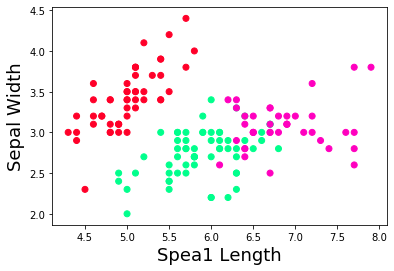

In [134]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,2], c=group.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Petal Length')

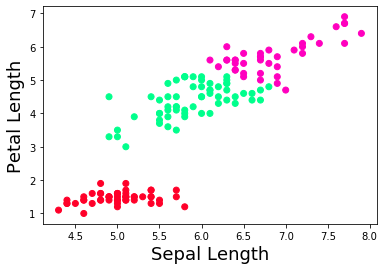

In [135]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,3], c=group.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)

Text(0, 0.5, 'Petal Width')

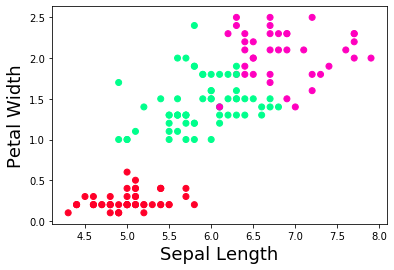

In [136]:
plt.scatter(iris.iloc[:,1], iris.iloc[:,4], c=group.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Text(0, 0.5, 'Petal Length')

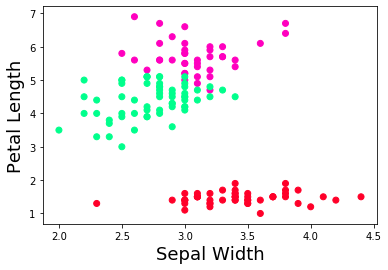

In [137]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,3], c=group.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Length', fontsize=18)

Text(0, 0.5, 'Petal Width')

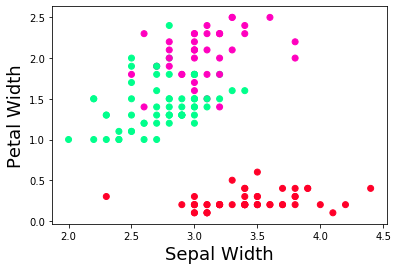

In [138]:
plt.scatter(iris.iloc[:,2], iris.iloc[:,4], c=group.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Text(0, 0.5, 'Petal Width')

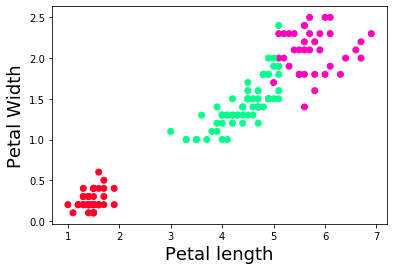

In [139]:
plt.scatter(iris.iloc[:,3], iris.iloc[:,4], c=group.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)